In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your file
df = pd.read_excel("full_ae_features.xlsx")

# 2. Separate features and label
X = df.drop(columns=['Label', 'EncodedLabel'])
y = df['EncodedLabel']

# Save feature names
feature_names = X.columns.tolist()

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# 4. Train baseline classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 5. Evaluate baseline
y_pred = clf.predict(X_test)
print("🎯 Baseline Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


🎯 Baseline Accuracy: 0.86

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.75        50
           1       1.00      0.98      0.99        50
           2       0.98      0.98      0.98        50
           3       0.73      0.72      0.73        50

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [2]:
# Example: Define spectral feature names manually
spectral_features = [col for col in X.columns if 'fft' in col.lower() or 'spectral' in col.lower() or 'freq' in col.lower()]

# Remove them
X_no_spectral = X.drop(columns=spectral_features)

# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_no_spectral, y, test_size=0.25, random_state=42, stratify=y)

# Train again
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train2, y_train2)

# Evaluate
y_pred2 = clf2.predict(X_test2)
print("🧪 Accuracy without Spectral Features:", round(accuracy_score(y_test2, y_pred2), 4))
print("\n📊 Classification Report:\n", classification_report(y_test2, y_pred2))


🧪 Accuracy without Spectral Features: 0.815

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.72      0.69        50
           1       1.00      0.98      0.99        50
           2       0.91      0.98      0.94        50
           3       0.69      0.58      0.63        50

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [3]:
td_features = [f for f in X.columns if 'td_' in f]
fd_features = [f for f in X.columns if 'fd_' in f]
tfd_features = [f for f in X.columns if 'tfd_' in f]
hos_features = [f for f in X.columns if 'hos_' in f]
burst_features = [f for f in X.columns if 'burst_' in f]


In [59]:
import pandas as pd

# Load the unsegmented AE feature file
file_path = r"E:\2 Paper MCT\Multi-Domain Paper\full_ae_features_unsegmented.xlsx"
df = pd.read_excel(file_path)

# Display shape and head
print(df.shape)
df.head()


(160, 21)


,mean,std,var,min,max,rms,peak,crest_factor,skewness,kurtosis,...,energy,iqr,zcr,spec_centroid,spec_entropy,spec_flatness,spec_rolloff,bandwidth,label,EncodedLabel
0,0.001298,0.096944,0.009398,-1.006843,1.001720,0.096952,1.006843,10.384932,-0.163017,9.120774,...,9399.750699,0.068882,34123,20065.921263,2.064888,0.004478,23437.5,13232.104230,BF,0
1,0.001370,0.096901,0.009390,-1.224807,1.379760,0.096911,1.379760,14.237372,-0.154040,10.184045,...,9391.774207,0.070822,34289,20086.656369,2.103753,0.004779,23437.5,13649.470382,BF,0
2,0.001632,0.097197,0.009447,-1.000375,0.978759,0.097211,1.000375,10.290760,-0.165558,8.263550,...,9449.984913,0.070175,34197,20161.806175,2.084939,0.004763,23437.5,13563.692463,BF,0
3,0.001624,0.094887,0.009004,-1.122293,1.069631,0.094901,1.122293,11.825930,-0.167258,10.249326,...,9006.201266,0.065971,34988,20410.468823,1.957877,0.003817,23437.5,12241.887132,BF,0
4,0.002075,0.097011,0.009411,-1.043386,0.956445,0.097033,1.043386,10.752854,-0.164938,8.702965,...,9415.480238,0.069528,34788,20402.410022,2.018864,0.004143,23437.5,12797.920213,BF,0


🎯 Test Accuracy (Ablation - Removed Spectral & Energy): 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



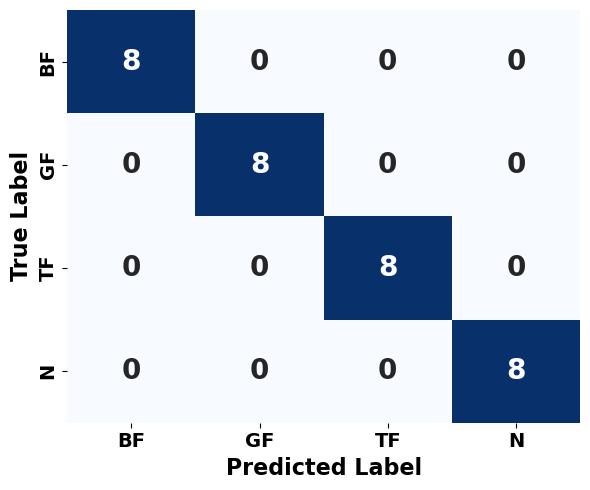

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file
df = pd.read_excel(r"E:\2 Paper MCT\Multi-Domain Paper\full_ae_features_unsegmented.xlsx")

# Define columns to drop (spectral + energy features)
features_to_remove = [
    'spec_centroid', 'spec_entropy', 'spec_flatness',
    'spec_rolloff', 'bandwidth', 'energy'
]

# Separate features and labels
X = df.drop(columns=['label', 'EncodedLabel'] + features_to_remove)
y = df['EncodedLabel']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Test Accuracy (Ablation - Removed Spectral & Energy): {acc:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = ['BF', 'GF', 'TF', 'N']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels,
            cbar=False, annot_kws={"size": 20, "fontweight": "bold"})
plt.xlabel('Predicted Label', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


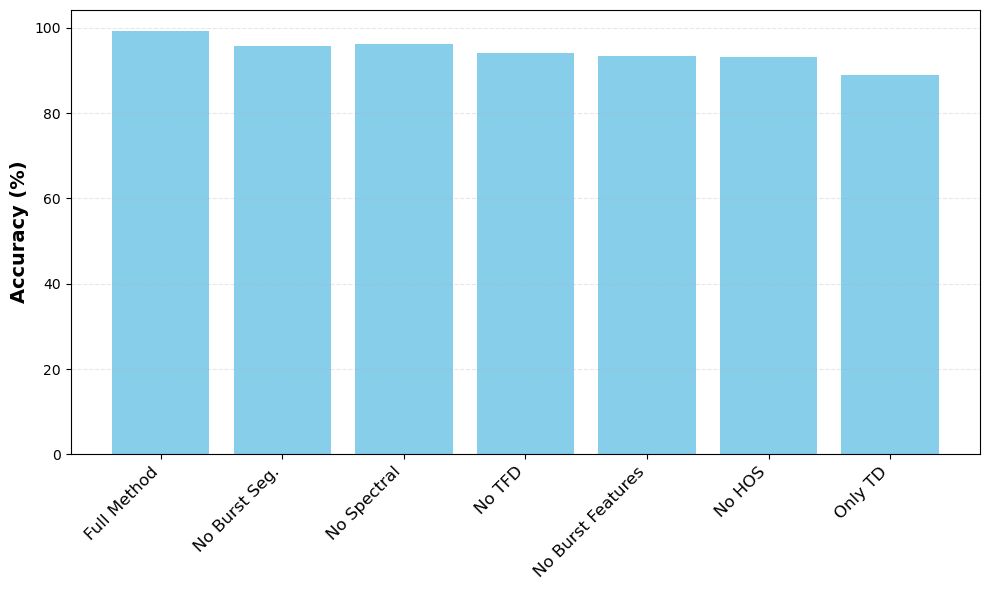

In [65]:
# Sample Code
import matplotlib.pyplot as plt

labels = [
    "Full Method", "No Burst Seg.", "No Spectral", "No TFD", "No Burst Features", "No HOS", "Only TD"
]
accuracy = [99.21, 95.67, 96.25, 94.10, 93.35, 93.10, 89.02]

plt.figure(figsize=(10,6))
plt.bar(labels, accuracy, color='skyblue')
plt.ylabel("Accuracy (%)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [67]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb  # or use your actual model, e.g., from sklearn.ensemble import RandomForestClassifier


In [68]:
# Load your extracted features (ensure the file path is correct)
df = pd.read_excel("E:/2 Paper MCT/Multi-Domain Paper/full_ae_features_unsegmented.xlsx")

# Separate features and label
X = df.drop(['label', 'EncodedLabel'], axis=1)
y = df['EncodedLabel']  # Make sure this matches your label column


In [69]:
model = xgb.XGBClassifier(n_estimators=100, max_depth=4, random_state=42)
model.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [70]:
explainer = shap.Explainer(model)
shap_values = explainer(X)


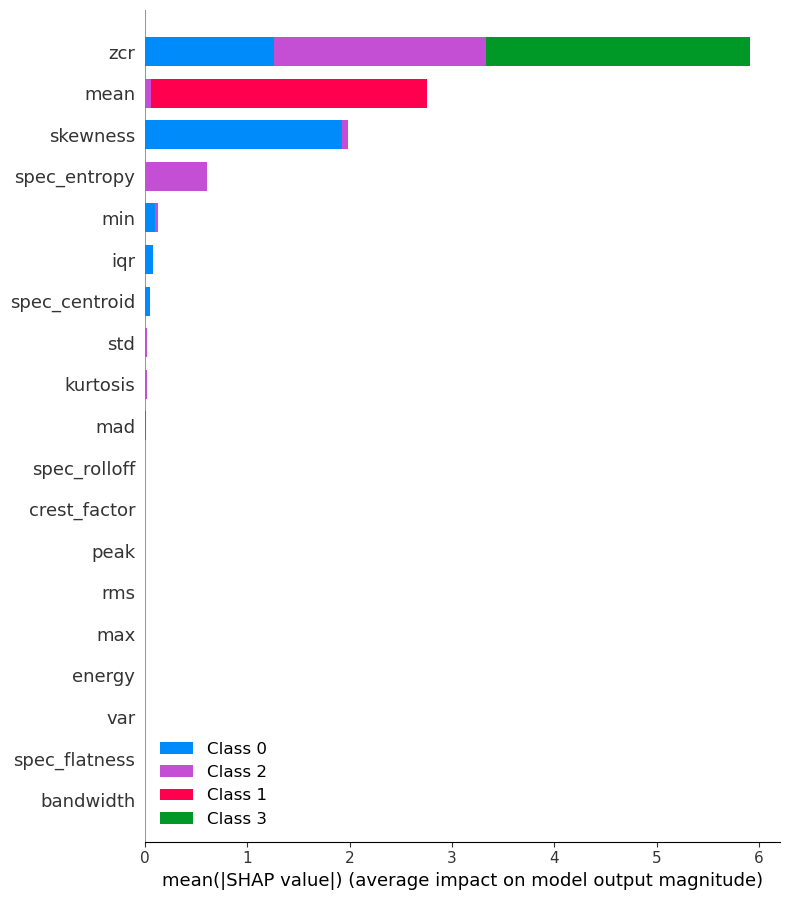

In [72]:
# Use summary plot (beeswarm)
shap.summary_plot(shap_values, X, plot_type="bar", show=True)
